In [1]:
import sys
sys.path.append(r'/home/chaofan/powerknowledge/data/')

In [2]:
from sklearn.cluster import KMeans
from sklearn import tree
import numpy as np
import time
import pydotplus
from IPython.display import Image, display
import matplotlib.pyplot as plt
from read_PLAID_data import get_feature_name




score:0.947761
train tree cost:0.03s


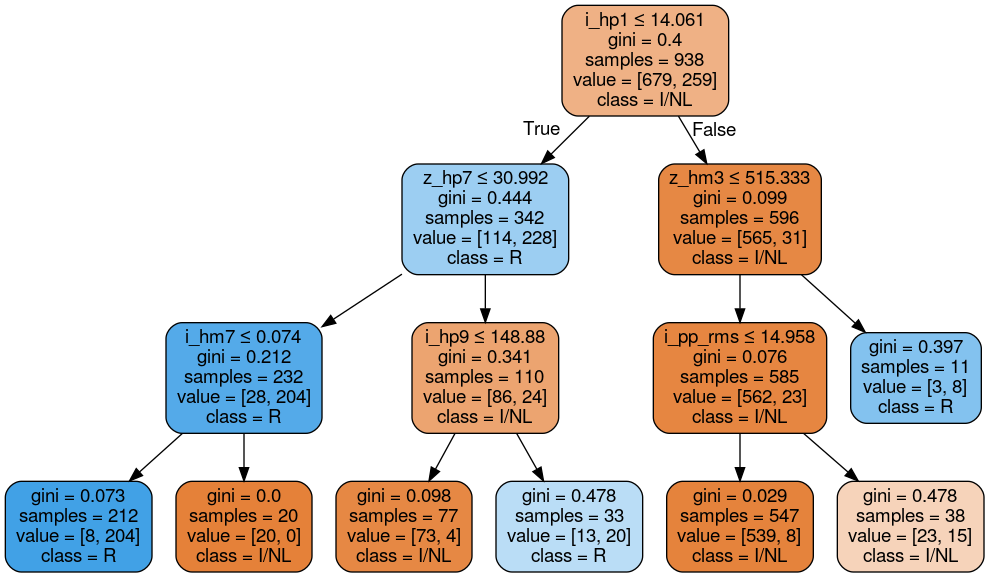

In [8]:
from sklearn.model_selection import train_test_split
import joblib
y = np.loadtxt('/home/chaofan/powerknowledge/model/knowledge_model/loadtype/y_label.csv', delimiter=',')
x=np.loadtxt('/home/chaofan/powerknowledge/model/knowledge_model/loadtype/x.csv', delimiter=',')

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)
start_tree_time = time.time()
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=100)
clf = clf.fit(x_train, y_train)
joblib.dump(clf,'/home/chaofan/powerknowledge/model/knowledge_model/load_clf.pkl')
print('score:%3.6f' % (clf.score(x_test, y_test)))
print('train tree cost:%2.2fs' % (time.time() - start_tree_time))
feature_name = get_feature_name()
del (feature_name[0])
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_name,
                                class_names=['I/NL', 'R',],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [7]:
from sklearn.model_selection import train_test_split
y = np.loadtxt('/home/chaofan/powerknowledge/model/knowledge_model/loadtype/y_label.csv', delimiter=',')
x = np.loadtxt('/home/chaofan/powerknowledge/model/knowledge_model/loadtype/x.csv', delimiter=',')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)
md=[1,2,3,4,5,6,7,8,9,10]
mss=[5,10,15,20,50,100,200]
for i in md:
    for j in mss:
        start_tree_time = time.time()
        clf = tree.DecisionTreeClassifier(max_depth=i, min_samples_split=j)
        clf = clf.fit(x_train, y_train)
        print('max_depth=%03d,min_sample_split=%03d: score %3.6f  cost:%2.2fs' % (i,j,clf.score(x_test, y_test),time.time() - start_tree_time))


max_depth=001,min_sample_split=005: score 0.848614  cost:0.02s
max_depth=001,min_sample_split=010: score 0.848614  cost:0.01s
max_depth=001,min_sample_split=015: score 0.848614  cost:0.01s
max_depth=001,min_sample_split=020: score 0.848614  cost:0.01s
max_depth=001,min_sample_split=050: score 0.848614  cost:0.01s
max_depth=001,min_sample_split=100: score 0.848614  cost:0.01s
max_depth=001,min_sample_split=200: score 0.848614  cost:0.01s
max_depth=002,min_sample_split=005: score 0.923241  cost:0.02s
max_depth=002,min_sample_split=010: score 0.923241  cost:0.02s
max_depth=002,min_sample_split=015: score 0.923241  cost:0.02s
max_depth=002,min_sample_split=020: score 0.923241  cost:0.02s
max_depth=002,min_sample_split=050: score 0.923241  cost:0.02s
max_depth=002,min_sample_split=100: score 0.923241  cost:0.02s
max_depth=002,min_sample_split=200: score 0.923241  cost:0.02s
max_depth=003,min_sample_split=005: score 0.948827  cost:0.03s
max_depth=003,min_sample_split=010: score 0.948827  cos